In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [3]:
''' Returns a random point in an n-dimensional ball using rejection sampling, along with the number of trials. '''
def rejection_sampling(n):
    trials = 0
    while True:
        trials += 1
        vec = np.empty(n)
        for i in range(n):
            vec[i] = random.random()
        if (np.dot(vec, vec) <= 1):
            return (vec, trials)

In [4]:
''' Runs rejection sampling for an n-dimensional vector t times and returns the average number of trials. '''
def rej_avg_trials(n, t):
    total = 0.
    for i in range(t):
        total += rejection_sampling(n)[1]
    return total / t

In [6]:
num_points = 3141
avg_trials = []
dimension = 14
for i in range(dimension):
    avg_trials.append(rej_avg_trials(i + 1, num_points))
print(avg_trials)

[1.0, 1.2846227316141356, 1.947787328876154, 3.183381088825215, 6.113976440624005, 12.435848455905763, 27.235275390003185, 62.4157911493155, 155.26774912448266, 404.79337790512574, 1089.8993950971028, 3094.251512257243, 9119.629417383, 28550.63228271251]


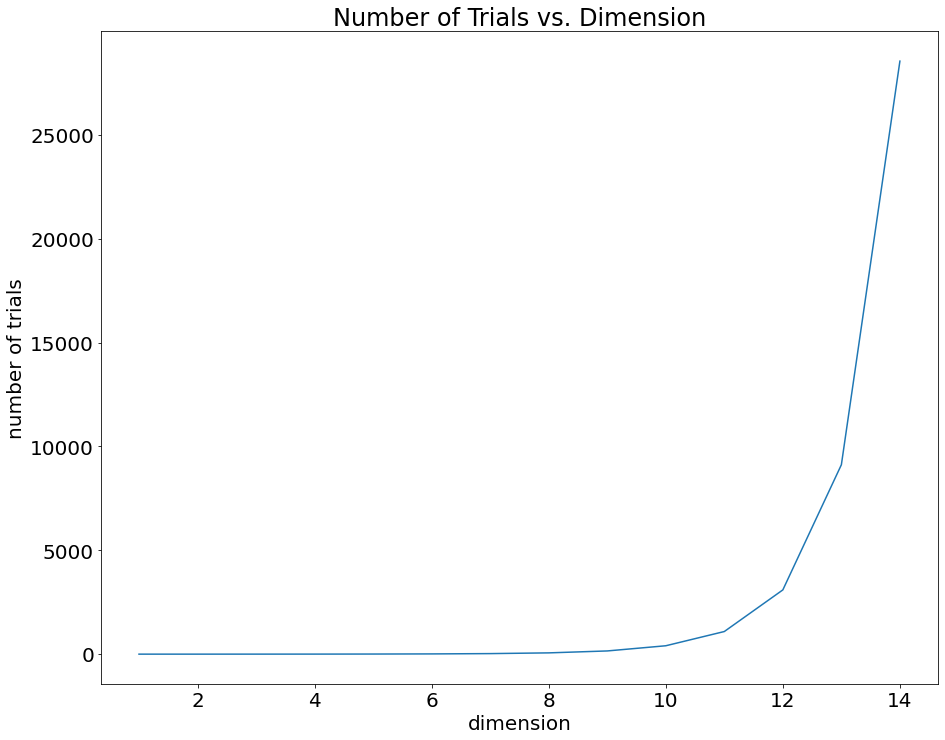

In [41]:
plt.figure(figsize=(15, 12))
plt.rcParams.update({'font.size': 20})
plt.plot(np.arange(1, dimension + 1), avg_trials)
plt.title("Number of Trials vs. Dimension")
plt.xlabel("dimension")
plt.ylabel("number of trials")
plt.yscale("linear")
plt.savefig("Trials vs. Dimension Linear.png", facecolor="#FFFFFF", transparent=False)

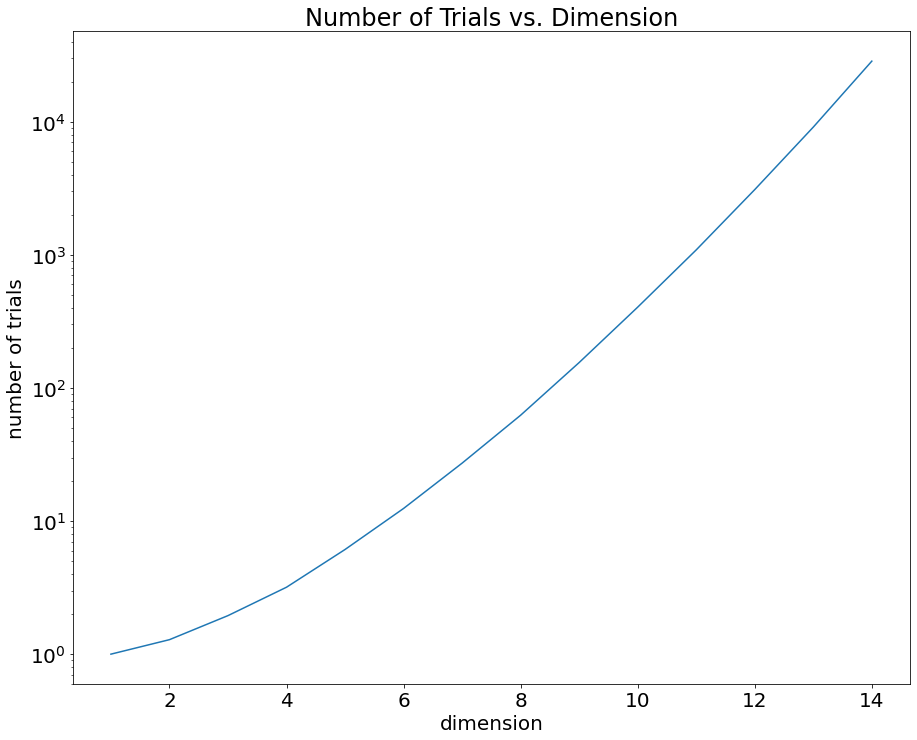

In [42]:
plt.figure(figsize=(15, 12))
plt.rcParams.update({'font.size': 20})
plt.plot(np.arange(1, dimension + 1), avg_trials)
plt.title("Number of Trials vs. Dimension")
plt.xlabel("dimension")
plt.ylabel("number of trials")
plt.yscale("linear")
plt.yscale("log")
plt.savefig("Trials vs. Dimension Log.png", facecolor="#FFFFFF", transparent=False)

In [7]:
# https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
n = 61
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
x, y = np.meshgrid(x, y)

x

array([[-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       ...,
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ]])

In [8]:
# Mean vector and covariance matrix
mu = np.array(np.zeros(2))  # Same as [0., 0.]
Sigma = np.array(np.identity(2))  # 2x2 identity matrix

# Pack x and y into a single 3-dimensional array
pos = np.empty((n, n, 2))
pos[:, :, 0] = x
pos[:, :, 1] = y

pos

array([[[-3. , -3. ],
        [-2.9, -3. ],
        [-2.8, -3. ],
        ...,
        [ 2.8, -3. ],
        [ 2.9, -3. ],
        [ 3. , -3. ]],

       [[-3. , -2.9],
        [-2.9, -2.9],
        [-2.8, -2.9],
        ...,
        [ 2.8, -2.9],
        [ 2.9, -2.9],
        [ 3. , -2.9]],

       [[-3. , -2.8],
        [-2.9, -2.8],
        [-2.8, -2.8],
        ...,
        [ 2.8, -2.8],
        [ 2.9, -2.8],
        [ 3. , -2.8]],

       ...,

       [[-3. ,  2.8],
        [-2.9,  2.8],
        [-2.8,  2.8],
        ...,
        [ 2.8,  2.8],
        [ 2.9,  2.8],
        [ 3. ,  2.8]],

       [[-3. ,  2.9],
        [-2.9,  2.9],
        [-2.8,  2.9],
        ...,
        [ 2.8,  2.9],
        [ 2.9,  2.9],
        [ 3. ,  2.9]],

       [[-3. ,  3. ],
        [-2.9,  3. ],
        [-2.8,  3. ],
        ...,
        [ 2.8,  3. ],
        [ 2.9,  3. ],
        [ 3. ,  3. ]]])

In [9]:
rv = multivariate_normal(mu, Sigma)
rv.pdf(pos)

array([[1.96412803e-05, 2.63807214e-05, 3.50800815e-05, ...,
        3.50800815e-05, 2.63807214e-05, 1.96412803e-05],
       [2.63807214e-05, 3.54326422e-05, 4.71169822e-05, ...,
        4.71169822e-05, 3.54326422e-05, 2.63807214e-05],
       [3.50800815e-05, 4.71169822e-05, 6.26543738e-05, ...,
        6.26543738e-05, 4.71169822e-05, 3.50800815e-05],
       ...,
       [3.50800815e-05, 4.71169822e-05, 6.26543738e-05, ...,
        6.26543738e-05, 4.71169822e-05, 3.50800815e-05],
       [2.63807214e-05, 3.54326422e-05, 4.71169822e-05, ...,
        4.71169822e-05, 3.54326422e-05, 2.63807214e-05],
       [1.96412803e-05, 2.63807214e-05, 3.50800815e-05, ...,
        3.50800815e-05, 2.63807214e-05, 1.96412803e-05]])

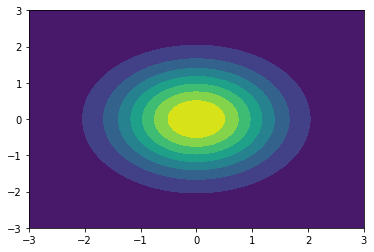

In [10]:
plt.contourf(x, y, rv.pdf(pos))

Text(0.5, 0, 'rv.pdf')

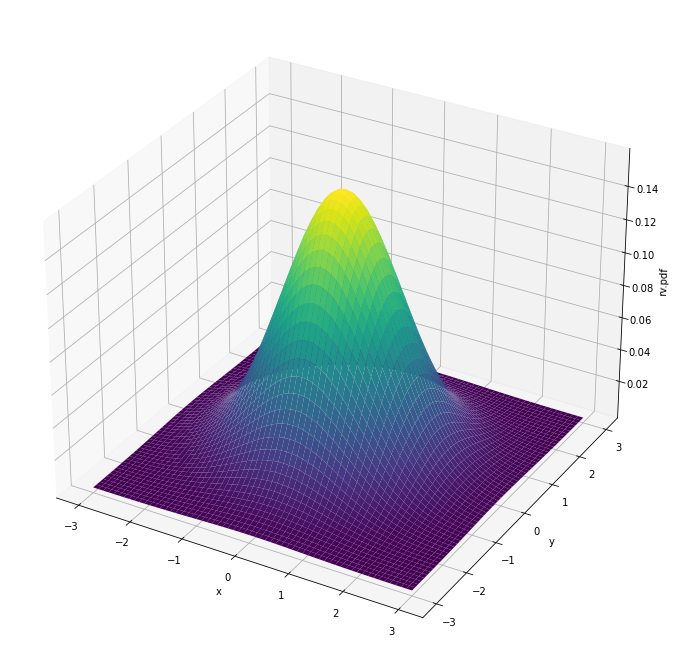

In [11]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, rv.pdf(pos), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('rv.pdf')

In [81]:
''' Returns a unit vector in R^n chosen uniformly at random. '''
def random_unit_vector(n):
    vec = np.empty(n)
    for i in range(n):
        vec[i] = np.random.normal(0., 1.)
    length = np.linalg.norm(vec)
    return vec / length

In [82]:
''' Returns a random point in an n-dimensional ball. Runs in polynomial time in n. '''
def normal_sampling(n):
    vec = random_unit_vector(n)
    r = (random.random()) ** (1.0 / n)
    return vec * r

(-1.0932568568681305,
 1.0892515159367175,
 -1.0880359946857028,
 1.0862066195733882)

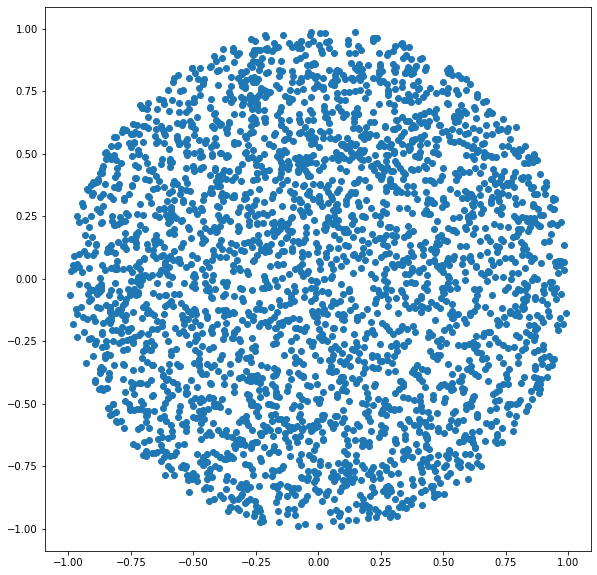

In [114]:
p = 3141  # Number of points
points = np.empty((p, 2))
for i in range(p):
    points[i] = normal_sampling(2)

plt.figure(figsize=(10, 10))
(xs, ys) = points.transpose()
plt.scatter(xs, ys)
plt.axis('scaled')


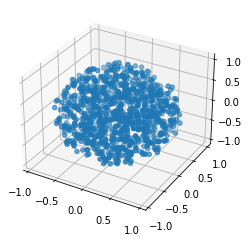

In [125]:
p = 1000  # Number of points
points = np.empty((p,3))
for i in range(p):
     points[i] = normal_sampling(3)
ax = plt.axes(projection = '3d')

(xs, ys, zs) = points.transpose()
ax.scatter(xs, ys, zs)
